<a href="https://colab.research.google.com/github/Rupneetk/DataViz/blob/master/HW538_Drug_use_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scource: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns

In [0]:
drug_use=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')
drug_use.reset_index(inplace=True)
drug_use.head()

,index,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [0]:
# subsetting the data
adults_22over_most=pd.DataFrame(drug_use.iloc[range(10, len(drug_use), 1),[1, 3, 5, 17]])
adults_22over_most

,age,alcohol-use,marijuana-use,pain-releiver-use
10,22-23,84.2,28.4,10.0
11,24-25,83.1,24.9,9.0
12,26-29,80.7,20.8,8.3
13,30-34,77.5,16.4,5.9
14,35-49,75.0,10.4,4.2
15,50-64,67.2,7.3,2.5
16,65+,49.3,1.2,0.6


In [0]:
style.use('fivethirtyeight')

In [0]:
adults_22over=pd.DataFrame(drug_use.iloc[range(10, len(drug_use), 1),[1, 2]])
adults_22over

,age,n
10,22-23,4707
11,24-25,4591
12,26-29,2628
13,30-34,2864
14,35-49,7391
15,50-64,3923
16,65+,2448


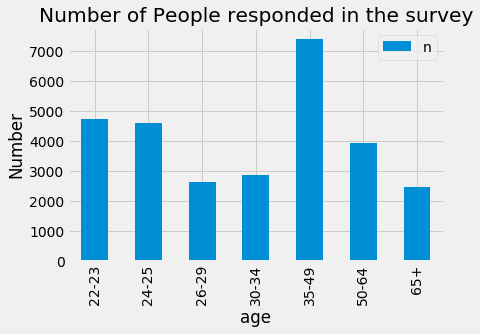

In [0]:
p_fig_0=adults_22over.set_index('age').plot(kind='bar', stacked=False)
plt.title("Number of People responded in the survey")
plt.ylabel("Number")
plt.show()

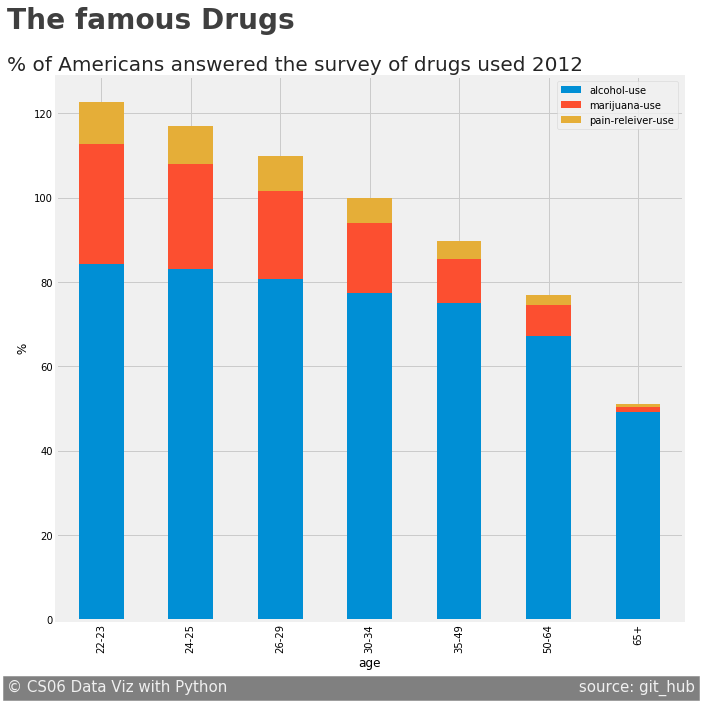

In [0]:
#adults_22over_most.percentage=pd.to_numeric(adults_22over_most_melted.percentage)
p_fig_1=adults_22over_most.set_index('age').plot(kind='bar', stacked=True,figsize=(10,10))
p_fig_1.axhline(y=0, color='black', alpha=0.7, linewidth=1.5)
p_fig_1.text(
    x=-1.05,
    y=-17,
    s="""© CS06 Data Viz with Python                                                                          source: git_hub""",
    fontsize=15,
    color='#f0f0f0',
    backgroundcolor='grey'
)
p_fig_1.text(x = -1.05, y = 130,
              s = "% of Americans answered the survey of drugs used before 2012",
              fontsize = 20, alpha = .85)
# helps to exetend the grid lines. 
plt.text(s="The famous Drugs", x = -1.05, y = 140,
              fontsize = 28, weight = 'bold', alpha = .75)
plt.ylabel(" % ")
plt.show()

How to use Melt the data :

In [0]:
adults_22over_most_melted=adults_22over_most.melt(id_vars='age',value_name='percentage',var_name='drug_type')
adults_22over_most_melted.head()

,age,drug_type,percentage
0,22-23,alcohol-use,84.2
1,24-25,alcohol-use,83.1
2,26-29,alcohol-use,80.7
3,30-34,alcohol-use,77.5
4,35-49,alcohol-use,75.0


In [0]:
#Other data subset
adults_22over_other_prominant=pd.DataFrame(drug_use.iloc[range(10, len(drug_use), 1),[1, 7, 13,21,23]])
adults_22over_other_prominant

,age,cocaine-use,hallucinogen-use,tranquilizer-use,stimulant-use
10,22-23,4.5,5.2,4.4,3.6
11,24-25,4.0,4.5,4.3,2.6
12,26-29,3.2,3.2,4.2,2.3
13,30-34,2.1,1.8,3.6,1.4
14,35-49,1.5,0.6,1.9,0.6
15,50-64,0.9,0.3,1.4,0.3
16,65+,0.0,0.1,0.2,0.0


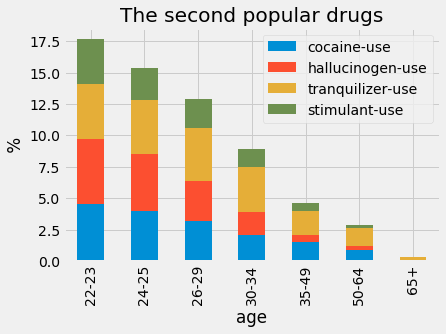

In [0]:
p_fig_2=adults_22over_other_prominant.set_index('age').plot(kind='bar', stacked=True)
plt.title("The second popular drugs")
plt.ylabel(" % ")
plt.show()

In [0]:
adults_22over_other_r=pd.DataFrame(drug_use.iloc[range(10, len(drug_use), 1),[1, 9, 11,15, 19,25,27]])
adults_22over_other_r


,age,crack-use,heroin-use,inhalant-use,oxycontin-use,meth-use,sedative-use
10,22-23,0.5,1.1,1.0,1.7,0.6,0.2
11,24-25,0.5,0.7,0.8,1.3,0.7,0.2
12,26-29,0.4,0.6,0.6,1.2,0.6,0.4
13,30-34,0.5,0.4,0.4,0.9,0.4,0.4
14,35-49,0.5,0.1,0.3,0.3,0.2,0.3
15,50-64,0.4,0.1,0.2,0.4,0.2,0.2
16,65+,0.0,0.0,0.0,0.0,0.0,0.0


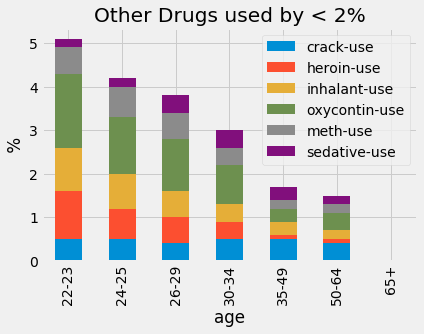

In [0]:
p_fig_3=adults_22over_other_r.set_index('age').plot(kind='bar', stacked=True)
plt.title("Other Drugs used by < 2%")
plt.ylabel(" % ")
plt.show()

In [0]:
%matplotlib inline

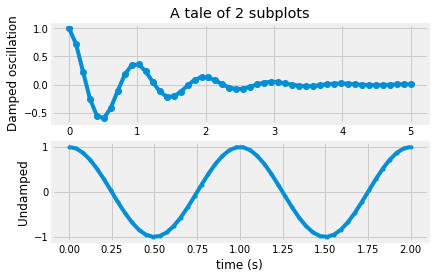

In [0]:
# creating the 2 list containing the column names such that one list contains only drug use and other contains drug frequency
column_names=drug_use.columns
use_col_names=column_names[3:29:2]
frqnc_col_names=column_names[4:29:2]